# Análise exploratória de dados

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Carregando o conjunto de dados
df=pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

## 1. Descrição dos dados

In [25]:
#o comando baixo nos fornece informações de quantas linhas e colunas é composto o conjunto de dados
df.head(30)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
271,272,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0
242,243,Manny Pacquiao,Philippines,2,11,Boxing,2015,160.0
281,282,Lionel Messi,Argentina,1,2,Soccer,2019,127.0
171,172,Tiger Woods,USA,1,1,golf,2008,115.0
272,273,Lionel Messi,Argentina,2,3,Soccer,2018,111.0
181,182,Tiger Woods,USA,1,1,golf,2009,110.0
282,283,Cristiano Ronaldo,Portugal,2,3,Soccer,2019,109.0
273,274,Cristiano Ronaldo,Portugal,3,1,Soccer,2018,108.0
291,292,Roger Federer,Switzerland,1,5,Tennis,2020,106.3


In [88]:
#df.Sport.replace('boxing', 'Boxing', regex = True, inplace=True)

In [4]:
df.shape

(301, 8)

In [5]:
#o comando info fornece informações mais completas do que o comando anterior.
#como o nome de cada coluna, tipo de dado e se há presença de dados faltantes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


### Nesse conjunto de dados há 24 de dados faltantes em "Previous Year Rank" como podemos observar com as informações extraídas do comando acima.

In [6]:
#outra forma de verificamos também se há dados faltantes é utilizar o comando abaixo, que contará se há caracteristicas com campo nulo
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

#o comando describe() obtemos mais informações sobre o conjunto de dados com realação a média,
#desvio padrão, os valores dos quartis (Q1, Q2 - mediana, Q3) e os valores de máximo e mínimo.
df.describe()

In [8]:
#renomeando a coluna earnings ($ million) para earnings
df.rename(columns={'earnings ($ million)': 'earnings'}, inplace=True)

# Gráfico em barras

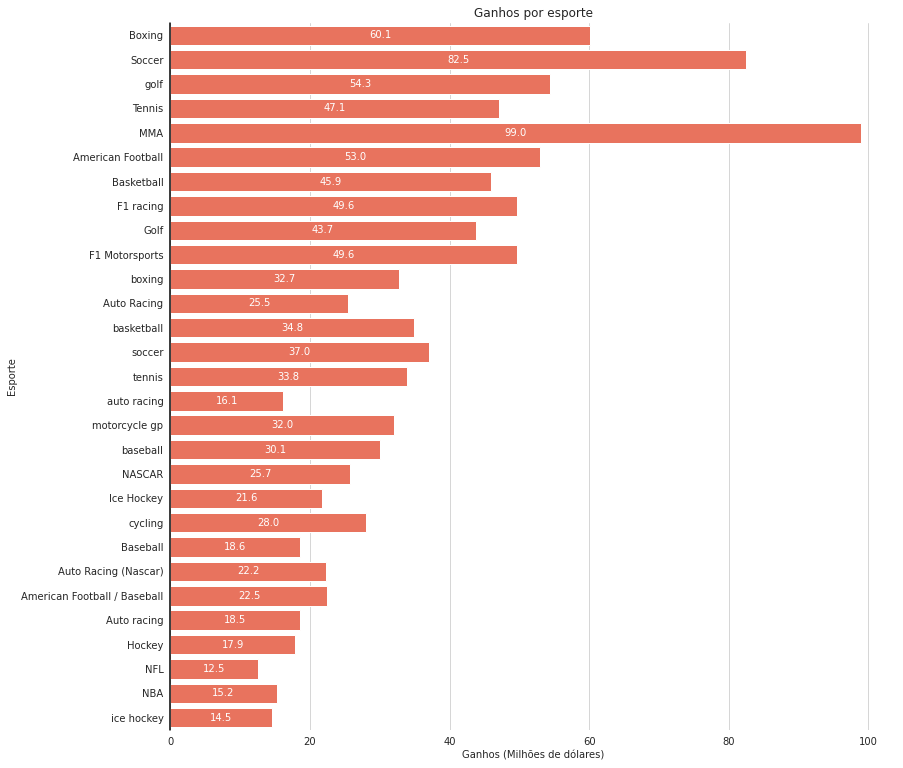

In [9]:
#ordenar as barras
df = df.sort_values(by='earnings', ascending=False)

#utilizar linhas verticais
sns.set_style("whitegrid")

#utilize as mesmas cores para barras
plt.figure(figsize=(13, 13))
ax = sns.barplot(data=df, x='earnings', y='Sport', color='tomato',ci=None)

#adicionar valores as barras
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)

#labels mais descritivos para melhorar a visualização 
plt.xlabel('Ganhos (Milhões de dólares)')
plt.ylabel('Esporte')
plt.title('Ganhos por esporte')

#adicionar uma linhas vertical na origem e remover as bordas
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()


### Dúvida: Por qual motivo as barras não ficaram em ordem? Por exemplo, por que MMA não ficou no topo

# Gráfico histograma 

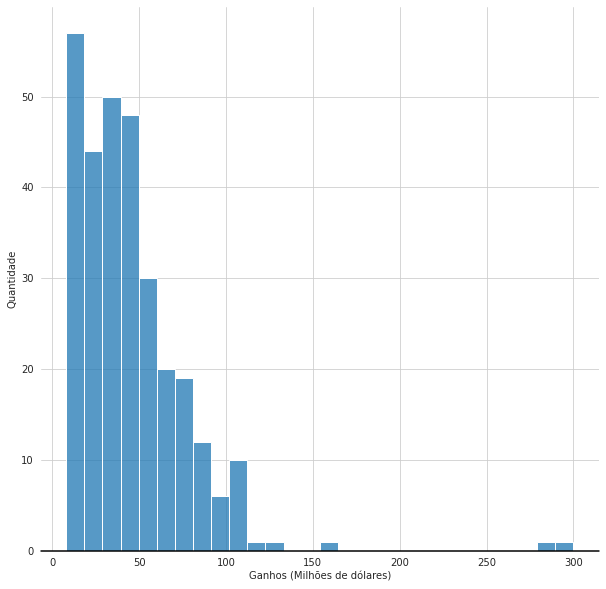

In [24]:
#utilizar linhas verticas e horizontais
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
#melhorar os labels dos eixos
ax = sns.histplot(data=df, x='earnings')
plt.ylabel('Quantidade')
plt.xlabel('Ganhos (Milhões de dólares)')

#adicionar linha a origem e remover as bordas
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

# Gráfico boxplot

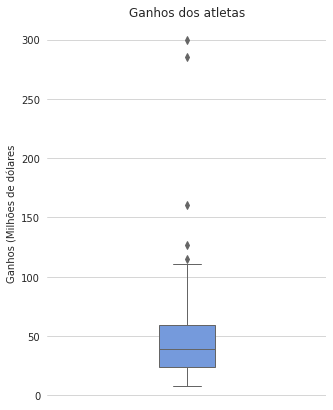

In [44]:

sns.set_style("whitegrid")
#utilizar a mesma cor para as barras
plt.figure(figsize=(5, 7))
#removendo as bordas
ax = sns.boxplot(y="earnings", data=df, color='cornflowerblue',width=0.2,
            linewidth=1.0).set(frame_on=False)

#melhorar o titulo e os labels dos eixos
plt.ylabel('Ganhos (Milhões de dólares')
plt.title('Ganhos dos atletas')
plt.show()

## 2. Perguntas de partida e hipóteses

Não consegui pensar em algo :(

## 3.Insights

Há uma variação salarial bem alta com atletas que recebem de 8,1 a 301 (milhoes de d), mas com media de U$ 45.51 (milhoes).
Pelos os gráficos de histograma e boxplot observamos os outliers com ganhos acima dos 100 milhões de dolares.